# K-Nearest Neighbors (KNN) Classification Project

This notebook implements and compares **Manual KNN** and **Scikit-Learn KNN** models  
on the *Telescope Dataset*. The main objectives are:
- Balance the dataset.
- Split the data into training, validation, and test sets.
- Implement KNN manually and using Scikit-Learn.
- Compare performance across different k values.
- Evaluate the final model on the test set.


In [118]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


data = pd.read_csv("telescope_data/telescope_data.csv")
gamma = data[data['class'] == 'g']
hydron = data[data['class'] == 'h']
# Randomly undersample the majority class (gamma) to match hydron
gamma_balanced = gamma.sample(len(hydron), random_state=42)

data_balanced = pd.concat([gamma_balanced, hydron])

#split the dataset
features= data_balanced.drop(columns=['class'])
labels = data_balanced['class']

features_train, features_temp, labels_train, labels_temp = train_test_split(
    features, labels, test_size=0.3, random_state=42
)
features_val, features_test, labels_val, labels_test = train_test_split(
    features_temp, labels_temp, test_size=0.5, random_state=42
)

#Apply K-NN Classifier to the data Manually
def knn_predict_manually(features_train, labels_train, test, k):
    features_train_np = features_train.to_numpy()
    labels_train_np = labels_train.to_numpy()
    test_np = test.to_numpy()

    predictions = []
    for test_point in test_np:
        distances = np.sqrt(np.sum ((features_train_np - test_point) ** 2, axis=1))
        k_indices = np.argsort(distances)[:k]
        k_labels = labels_train_np[k_indices]
        values, counts = np.unique(k_labels, return_counts=True)
        predictions.append(values[np.argmax(counts)])

    return np.array(predictions)

 #Apply different k values to get the best results in both cases
k_values = [1, 5, 50, 150, 500, 900, 1200,2000,3000,4500,6000,7500]
accuracies_sklearn = []
accuracies_manual = []

for k in k_values:
    y_val_pred = knn_predict_manually(features_train, labels_train, features_val, k)
    acc = accuracy_score(labels_val, y_val_pred)
    accuracies_manual.append(acc)
    print(f"Manual KNN Accuracy with k={k}: {acc:.4f}")
print("\n")
#apply K-NN Classifier to the data by using Scikit-Learn.
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features_train, labels_train)
    y_val_pred = knn.predict(features_val)
    acc = accuracy_score(labels_val, y_val_pred)
    accuracies_sklearn.append(acc)
    print(f"Scikit-Learn KNN Accuracy with k={k}: {acc:.4f}")

Manual KNN Accuracy with k=1: 0.9995
Manual KNN Accuracy with k=5: 1.0000
Manual KNN Accuracy with k=50: 0.9995
Manual KNN Accuracy with k=150: 0.9960
Manual KNN Accuracy with k=500: 0.9935
Manual KNN Accuracy with k=900: 0.9850
Manual KNN Accuracy with k=1200: 0.9826
Manual KNN Accuracy with k=2000: 0.9766
Manual KNN Accuracy with k=3000: 0.9641
Manual KNN Accuracy with k=4500: 0.9477
Manual KNN Accuracy with k=6000: 0.9312
Manual KNN Accuracy with k=7500: 0.9182


Scikit-Learn KNN Accuracy with k=1: 0.9995
Scikit-Learn KNN Accuracy with k=5: 1.0000
Scikit-Learn KNN Accuracy with k=50: 0.9995
Scikit-Learn KNN Accuracy with k=150: 0.9960
Scikit-Learn KNN Accuracy with k=500: 0.9935
Scikit-Learn KNN Accuracy with k=900: 0.9850
Scikit-Learn KNN Accuracy with k=1200: 0.9826
Scikit-Learn KNN Accuracy with k=2000: 0.9766
Scikit-Learn KNN Accuracy with k=3000: 0.9641
Scikit-Learn KNN Accuracy with k=4500: 0.9477
Scikit-Learn KNN Accuracy with k=6000: 0.9312
Scikit-Learn KNN Accuracy with k=7

## Validation Accuracy vs K

In this section, we compare the Manual KNN implementation and the Scikit-Learn KNN
implementation using different `k` values.

- Small `k` values cause overfitting (the model memorizes data).
- Large `k` values cause underfitting (the model becomes too simple).
- The goal is to find the optimal k that gives the best validation accuracy.


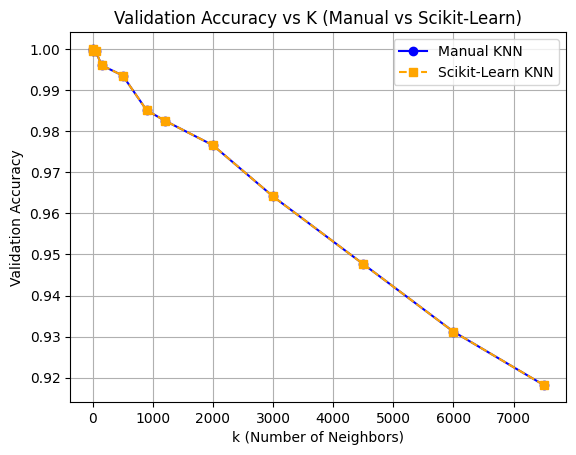

In [119]:
#Plot validation accuracy vs.k values for both implementations
plt.plot(k_values, accuracies_manual, marker='o', label='Manual KNN', color='blue')
plt.plot(k_values, accuracies_sklearn, marker='s', label='Scikit-Learn KNN', color='orange', linestyle='--')
plt.title("Validation Accuracy vs K (Manual vs Scikit-Learn)")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Identify best k
best_k_manual = k_values[np.argmax(accuracies_manual)]
best_k_sklearn = k_values[np.argmax(accuracies_sklearn)]

In [120]:
# calculate accuracy, precision, recall, f1-score, and confusion matrix on the test set for both implementations

# Combine train + val
X_trainval = pd.concat([features_train, features_val], ignore_index=True)
y_trainval = pd.concat([labels_train, labels_val], ignore_index=True)

# Manual KNN  Test
y_test_pred_manual = knn_predict_manually(X_trainval, y_trainval, features_test, best_k_manual)
acc1 = accuracy_score(labels_test, y_test_pred_manual)
prec1 = precision_score(labels_test, y_test_pred_manual, pos_label='g') 
rec1 = recall_score(labels_test, y_test_pred_manual, pos_label='g')
f1_1 = f1_score(labels_test, y_test_pred_manual, pos_label='g')
cm1 = confusion_matrix(labels_test, y_test_pred_manual)


print("\n ----- Manual KNN------ ")
print(f"Best k = {best_k_manual}")
print("Accuracy:", acc1)
print("Precision:", prec1)
print("Recall:", rec1)
print("F1-score:", f1_1)
print("Confusion Matrix:\n", cm1)



# Scikit-Learn KNN  Test
knn_final = KNeighborsClassifier(n_neighbors=best_k_sklearn)
knn_final.fit(X_trainval, y_trainval)
y_test_pred_sklearn = knn_final.predict(features_test)

acc2 = accuracy_score(labels_test, y_test_pred_sklearn)
prec2 = precision_score(labels_test, y_test_pred_sklearn, pos_label='g') 
rec2 = recall_score(labels_test, y_test_pred_sklearn, pos_label='g')
f1_2 = f1_score(labels_test, y_test_pred_sklearn, pos_label='g')
cm2 = confusion_matrix(labels_test, y_test_pred_sklearn)


print("  ------ Scikit-Learn KNN-------- ")
print(f"Best k = {best_k_sklearn}")

print("Accuracy:", acc2)
print("Precision:", prec2)
print("Recall:", rec2)
print("F1-score:", f1_2)
print("Confusion Matrix:\n", cm2)




 ----- Manual KNN------ 
Best k = 5
Accuracy: 0.9995017438963627
Precision: 1.0
Recall: 0.999009900990099
F1-score: 0.9995047052996533
Confusion Matrix:
 [[1009    1]
 [   0  997]]
  ------ Scikit-Learn KNN-------- 
Best k = 5
Accuracy: 0.9995017438963627
Precision: 1.0
Recall: 0.999009900990099
F1-score: 0.9995047052996533
Confusion Matrix:
 [[1009    1]
 [   0  997]]


## Summary 

- Both Manual and Scikit-Learn KNN achieved very similar results.
- The optimal k was found by maximizing the validation accuracy.
- For small `k` values (like 5), the model performs very well but may slightly overfit.
- For large `k` values, the model generalizes more but loses accuracy.
- The test set results confirm that both implementations are correct and consistent.
